In [1]:
import numpy as np
import pandas as pd
import string as st
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords 

In [2]:
spam = pd.read_csv("spam.csv")

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
#1. Date Cleaning
#2. EDA
#3. Text Preprocessing
#4. model building
#5. Evaluation
#6. Improvment
#7. website
#8. Deploy


Data Cleaning

In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
spam.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [8]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#renaming the columns 
spam.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [10]:
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
spam['target'] = encoder.fit_transform(spam['target'])

In [13]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# missing values
spam.isnull().sum()

In [14]:
# missing values
spam.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
spam.duplicated().sum()

403

In [16]:
spam = spam.drop_duplicates(keep = 'first')

In [17]:
spam.duplicated().sum()

0

In [18]:
spam.shape

(5169, 2)

2.EDA(explodatory data analysis)

In [19]:
spam['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
spam['text'].value_counts()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later                  

([<matplotlib.patches.Wedge at 0x21ed907a070>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

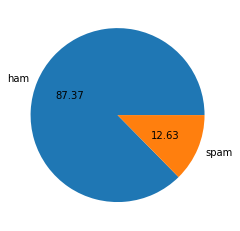

In [21]:
import matplotlib.pyplot as plt
plt.pie(spam['target'].value_counts(),labels = ['ham','spam'], autopct = '%0.2f')

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Prince Kumar
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
#number of charecters
spam['num_charecter'] = spam['text'].apply(len)

C:\Users\Prince Kumar Singh\AppData\Local\Temp\ipykernel_20112\1997024570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_charecter'] = spam['text'].apply(len)


In [25]:
spam.head()

,target,text,num_charecter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#numers of charecter

In [26]:
spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Prince Kumar Singh\AppData\Local\Temp\ipykernel_20112\545784398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_words'] = spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
spam.head()

,target,text,num_charecter,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
spam['num_sentence'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Prince Kumar Singh\AppData\Local\Temp\ipykernel_20112\412039168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['num_sentence'] = spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
spam.head()

,target,text,num_charecter,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
spam[['num_charecter','num_words','num_sentence']].describe()

,num_charecter,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.453279,1.947185
std,58.236795,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
##spam
spam[spam['target'] == 1][['num_charecter','num_words','num_sentence']].describe()

,num_charecter,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
#ham
spam[spam['target'] == 0][['num_charecter','num_words','num_sentence']].describe()

,num_charecter,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.120903,1.799601
std,56.358868,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='num_charecter', ylabel='Count'>

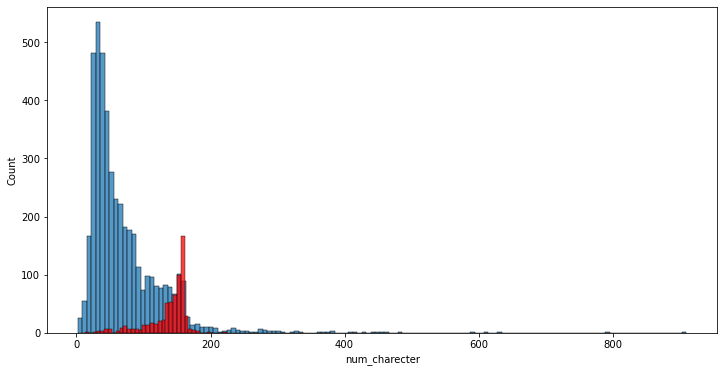

In [33]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(spam[spam['target'] == 0]['num_charecter'])
sns.histplot(spam[spam['target'] == 1]['num_charecter'], color = 'red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

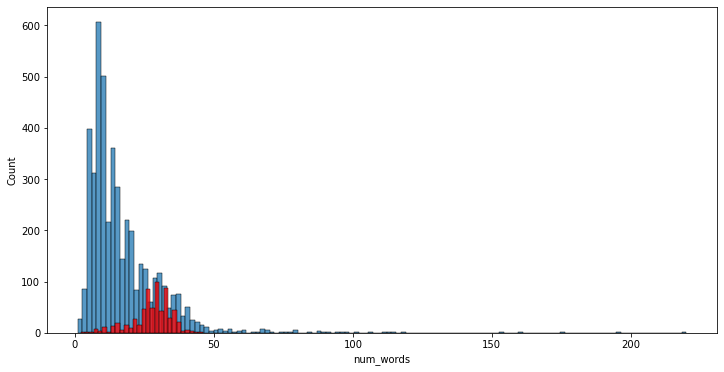

In [34]:
#plot graph as for words
plt.figure(figsize = (12,6))
sns.histplot(spam[spam['target'] == 0]['num_words'])
sns.histplot(spam[spam['target'] == 1]['num_words'], color = 'red')

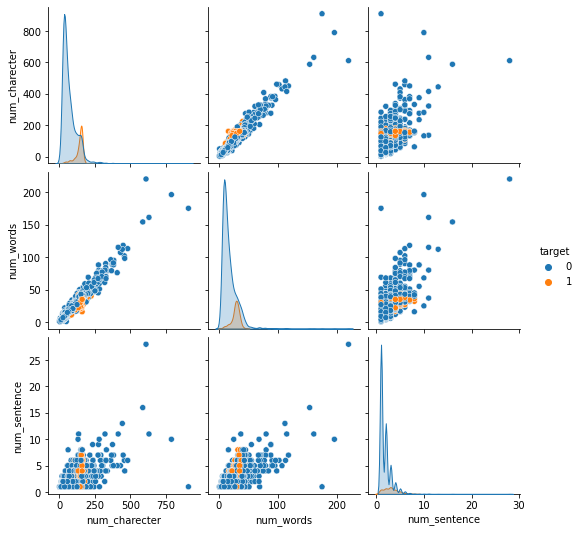

In [35]:
sns.pairplot(spam, hue = 'target')

<AxesSubplot:>

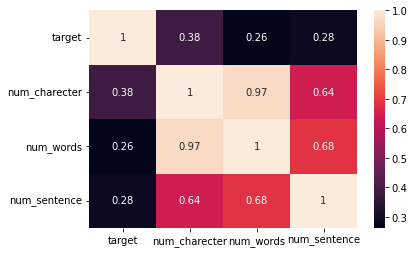

In [36]:
sns.heatmap(spam.corr(), annot = True)

In [37]:
# 3.data Preprocessing
# .lower case
# .Tokenization
# .removing speial chrecters
# .removing stop words and punctuation
# .stemming


In [38]:
def trasform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in  stopwords.words('english') and i not in st.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('singed')

'sing'

In [40]:
trasform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Prince Kumar Singh/nltk_data'
    - 'C:\\anaconda\\nltk_data'
    - 'C:\\anaconda\\share\\nltk_data'
    - 'C:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Prince Kumar Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [41]:
spam['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Prince Kumar Singh/nltk_data'
    - 'C:\\anaconda\\nltk_data'
    - 'C:\\anaconda\\share\\nltk_data'
    - 'C:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Prince Kumar Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [43]:
import string as st
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
spam['trasform_text']=spam['text'].apply(trasform_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Prince Kumar Singh/nltk_data'
    - 'C:\\anaconda\\nltk_data'
    - 'C:\\anaconda\\share\\nltk_data'
    - 'C:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Prince Kumar Singh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
spam.head()

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10, background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [46]:
#for spam messages
spam_wc = wc.generate(spam[spam['target'] ==1]['trasform_text'].str.cat(sep =" "))

NameError: name 'wc' is not defined

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

NameError: name 'spam_wc' is not defined

<Figure size 864x432 with 0 Axes>

In [48]:
#for ham messages
ham_wc = wc.generate(spam[spam['target'] == 0]['trasform_text'].str.cat(sep =" "))

NameError: name 'wc' is not defined

In [49]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

NameError: name 'ham_wc' is not defined

<Figure size 864x432 with 0 Axes>

In [50]:
spam_corpus = []
for msg in spam[spam['target'] ==1]['trasform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

KeyError: 'trasform_text'

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in spam[spam['target'] ==0]['trasform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
ham_corpus

NameError: name 'ham_corpus' is not defined

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

NameError: name 'ham_corpus' is not defined

# #Model Building

In [53]:
## some changes apply here
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [54]:
X = tfidf.fit_transform(spam['trasform_text']).toarray()

KeyError: 'trasform_text'

In [55]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [56]:
X.shape

NameError: name 'X' is not defined

In [57]:
Y = spam['target'].values

In [58]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)


NameError: name 'X' is not defined

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

NameError: name 'x_train' is not defined

In [64]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

NameError: name 'x_train' is not defined

In [65]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

NameError: name 'x_train' is not defined

In [66]:
#tfidf --> MNB

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver= 'liblinear',penalty = '11')
rfc = RandomForestClassifier(n_estimators=50, random_state = 2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state = 2)
xgb = XGBClassifier(n_estimators=50, random_state = 2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    "NB" : mnb,
    "DT" : dtc,
    'RF' : rfc,
    'Adaboost':abc,
    'Bgc':bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'Xgb' : xgb
    
    
    
    }

In [68]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [69]:
train_classifier(svc,x_train,y_train,x_test,y_test)

NameError: name 'svc' is not defined

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print('For',name)
    print('accuracy -',current_accuracy)
    print('precision -',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

NameError: name 'clfs' is not defined

In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

NameError: name 'clfs' is not defined

In [72]:
#imrove model
#1. change the max_feature parameter of tfidf

In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [74]:
pickle.dump(mnb,open('model2.pkl','wb'))